## **Data**

Download the .csv  data file [skynet](https://drive.google.com/file/d/1FndFVKzEBr3qllD_Gq8InmAdjB55Gd3N/view?usp=sharing)

The data isn't sussy baka, I promise

## **Background**

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects. 


**Acknowledgements**

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Kaggle [https://www.kaggle.com/uciml/faulty-steel-plates]



## **Project Objective**



Design and train an AI which correctly classifies the data into one of seven classes. The classes can be seen in the "Labels" column in the "defects.csv" file provided. Each class in the dataset is encoded into by a number, seen below. This project is sectioned into several milestones to provide a timeline and a sequence of tasks that need to be completed.

*  0 = Pastry
*  1 = Z_Scratch
*  2 = K_Scratch
*  3 = Stains
*  4 = Dirt
*  5 = Bumps
*  6 = Other faults

The most important thing you can take away from this project is the theory behind AI for numerical data.







## **Milestone 1**

*   Read the data
*   Perform visualizations to better understand the data


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot #for making plots appear with same theme
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

In [4]:
#read data
df = pd.read_csv("defects.csv")

In [5]:
df

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Labels
0,0,42,50,270900,270944,267,17,44,24220,76,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,1,645,651,2538079,2538108,108,10,30,11397,84,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,2,829,835,1553913,1553931,71,8,19,7972,99,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,3,853,860,369370,369415,176,13,45,18996,99,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,4,1289,1306,498078,498335,2409,60,260,246930,37,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1936,249,277,325780,325796,273,54,22,35033,119,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,6
1937,1937,144,175,340581,340598,287,44,24,34599,112,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,6
1938,1938,145,174,386779,386794,292,40,22,37572,120,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,6
1939,1939,137,170,422497,422528,419,97,47,52715,117,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1941 non-null   int64  
 1   X_Minimum              1941 non-null   int64  
 2   X_Maximum              1941 non-null   int64  
 3   Y_Minimum              1941 non-null   int64  
 4   Y_Maximum              1941 non-null   int64  
 5   Pixels_Areas           1941 non-null   int64  
 6   X_Perimeter            1941 non-null   int64  
 7   Y_Perimeter            1941 non-null   int64  
 8   Sum_of_Luminosity      1941 non-null   int64  
 9   Minimum_of_Luminosity  1941 non-null   int64  
 10  Maximum_of_Luminosity  1941 non-null   int64  
 11  Length_of_Conveyer     1941 non-null   int64  
 12  TypeOfSteel_A300       1941 non-null   int64  
 13  TypeOfSteel_A400       1941 non-null   int64  
 14  Steel_Plate_Thickness  1941 non-null   int64  
 15  Edge

<AxesSubplot:xlabel='Labels', ylabel='count'>

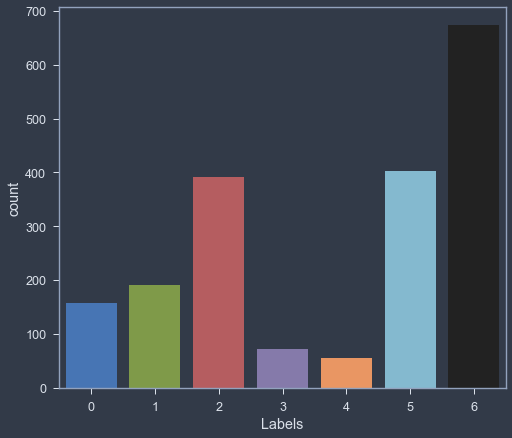

In [6]:
sns.countplot(x="Labels", data=df)

<AxesSubplot:>

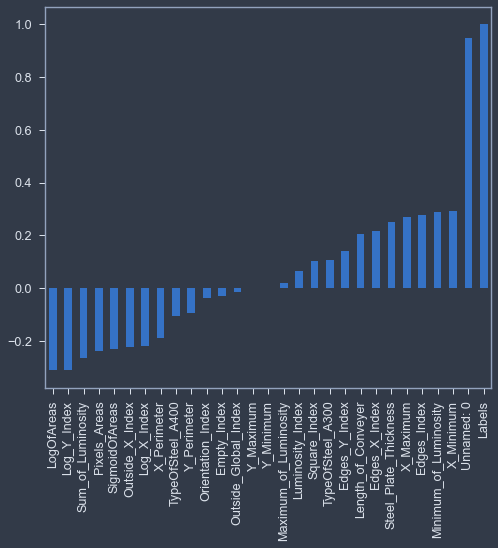

In [7]:
df.corr()['Labels'].sort_values().plot(kind='bar')

## **Milestone 2**

*   Data preprocessing
*   Train-test-split
*   Categorize labels

In [10]:
X = df.drop('Labels', axis = 1).values
y = df['Labels'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train.shape

(1455,)

In [16]:
y_cat_test = to_categorical(y_test,7)
y_cat_train = to_categorical(y_train,7)

## **Milestone 3**

*   Network architecture
*   Train network

In [22]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
X_train.shape

(1455, 28)

In [48]:
model = Sequential() 
model.add(Dense(28, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(7, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
# training time variation between 10 to 600 seconds

In [50]:
%%time 
model.fit(x=X_train, 
          y=y_cat_train,
          epochs=100, 
          validation_data=(X_test,y_cat_test), 
          callbacks=[early_stop])

Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 1.8188 - accuracy: 0.3258 - val_loss: 1.6813 - val_accuracy: 0.3210
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5367 - accuracy: 0.4433 - val_loss: 1.4418 - val_accuracy: 0.5062
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2767 - accuracy: 0.5333 - val_loss: 1.1925 - val_accuracy: 0.5514
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0675 - accuracy: 0.5835 - val_loss: 0.9975 - val_accuracy: 0.5926
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9181 - accuracy: 0.6536 - val_loss: 0.8423 - val_accuracy: 0.7078
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.7326 - val_loss: 0.7169 - val_accuracy: 0.7407
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.7505 - val_loss: 0.6248 - val_accuracy: 0.7737
Epoch 8/100
4

Epoch 59/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9553 - val_loss: 0.1378 - val_accuracy: 0.9609
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9581 - val_loss: 0.1355 - val_accuracy: 0.9547
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9567 - val_loss: 0.1298 - val_accuracy: 0.9609
Epoch 62/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9691 - val_loss: 0.1330 - val_accuracy: 0.9568
Epoch 63/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.9588 - val_loss: 0.1300 - val_accuracy: 0.9588
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9595 - val_loss: 0.1661 - val_accuracy: 0.9424
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.9615 - val_loss: 0.1286 - val_accuracy: 0.9588
Epoch 

## **Milestone 4**



*   Evaluate AI performance
*   Test AI
*   Save Model



In [46]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.905289,0.205498,1.836833,0.181070
1,1.686561,0.221993,1.608241,0.304527
2,1.448635,0.439863,1.441159,0.460905
3,1.306895,0.500344,1.339800,0.450617
4,1.199378,0.523024,1.207838,0.543210
...,...,...,...,...
95,0.068358,0.980069,0.116778,0.971193
96,0.070023,0.973883,0.100994,0.975309
97,0.074600,0.975258,0.109919,0.973251
98,0.077799,0.976632,0.111827,0.971193


<AxesSubplot:>

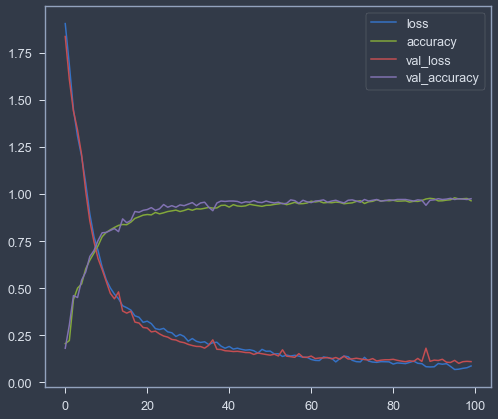

In [47]:
losses.plot()